In [1]:
from pathlib import Path

In [2]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Load data

In [4]:
wf_dir = Path('/home/jared/code/gambit/gambit-publication')

In [5]:
with open(wf_dir / 'config/config.yaml') as f:
    config = yaml.safe_load(f)

In [6]:
output1 = Path('/home/jared/projects/gambit/data/misc/220609-gc-vm-workflow-output/')
output2 = Path('/home/jared/projects/gambit/data/misc/220609-lyn-benchmark-results/')

In [14]:
df = pd.concat(
    [
        pd.read_csv(output1 / 'results/benchmarks/set1_vs_set1.csv', index_col=[0, 1, 2, 3, 4]),
        pd.read_csv(output2 / 'set1_vs_set1.csv', index_col=[0, 1, 2, 3, 4]),
    ],
    keys=['cloud', 'lyn'],
    names=['run'],
)

In [15]:
# df = df.reset_index()
df = df.rename(columns=dict(real='wall_time'))
df['cpu_time'] = df['user'] + df['sys']

In [16]:
df['label1'] = [f'{row.tool} {row.command}' for _, row in df.reset_index().iterrows()]

In [44]:
runs = df.index.levels[0]
ncores = df.index.levels[5]

## Plot

In [ ]:
fg = sns.relplot(
    data=df,
    x='ncores',
    y='cpu_time',
    col='tool',
    hue='label1',
    style='paramset',
    marker='run',
)

for ax in fg.axes.flat:
    ax.set_yscale('log')
    ax.set_xscale('log')

In [48]:
cpu_rows = ~df.index.get_level_values('command').isin(['fastani', 'query_sketch', 'ref_sketch'])

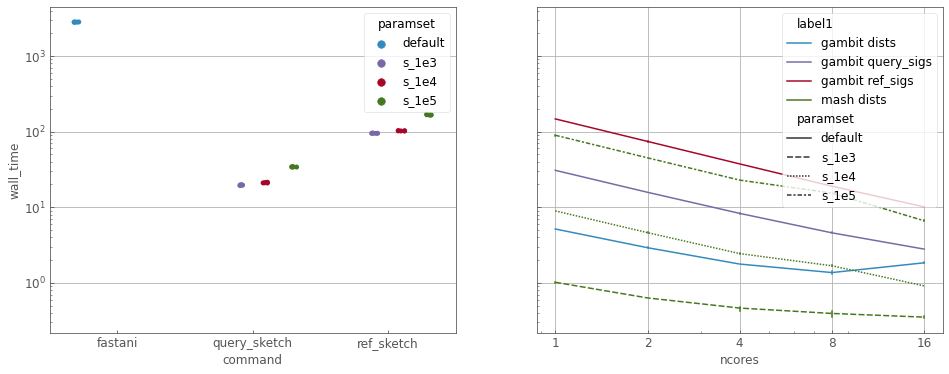

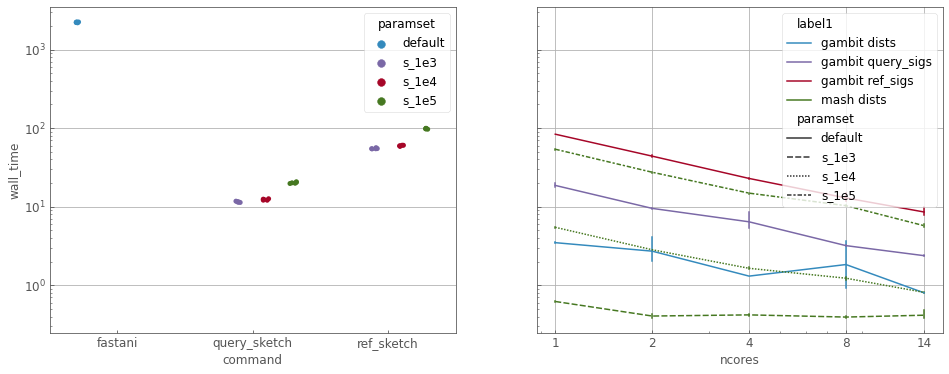

In [52]:
for run in runs:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True,)
    
    _df1 = df[~cpu_rows].loc[run].reset_index()
    _df2 = df[cpu_rows].loc[run]
    _ncores = sorted(_df2.reset_index()['ncores'].unique())

    sns.stripplot(
        ax=axs[0],
        data=_df1,
        x='command',
        y='wall_time',
        hue='paramset',
        dodge=True,
    )

    sns.lineplot(
        ax=axs[1],
        data=_df2.reset_index(),
        x='ncores',
        y='wall_time',
        err_style='bars',
        hue='label1',
        style='paramset',
    )

    axs[0].set_yscale('log')

    axs[1].set_xscale('log')
    axs[1].set_xticks(_ncores)
    axs[1].set_xticklabels(list(map(str, _ncores)))
    # fig.tight_layout()

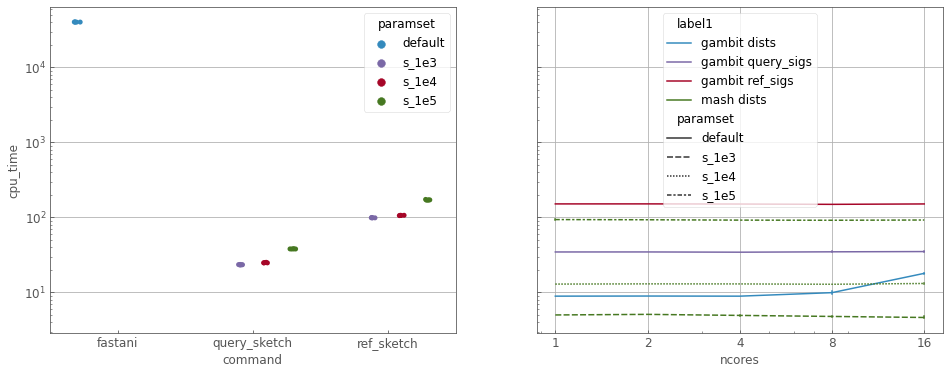

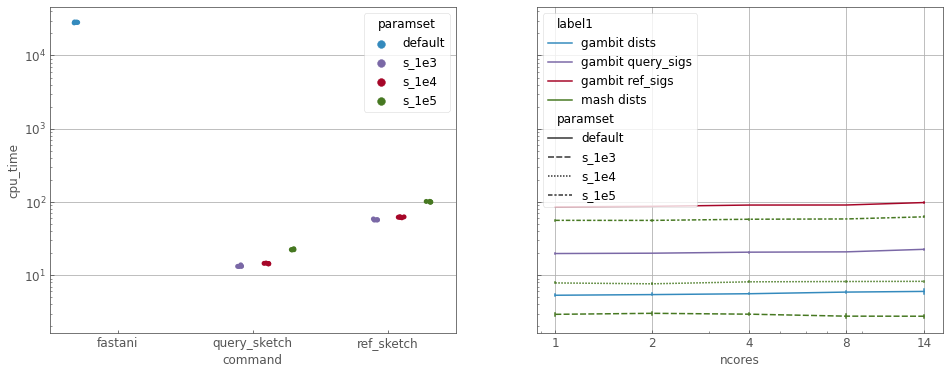

In [57]:
for run in runs:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True,)
    
    _df1 = df[~cpu_rows].loc[run].reset_index()
    _df2 = df[cpu_rows].loc[run]
    _ncores = sorted(_df2.reset_index()['ncores'].unique())

    sns.stripplot(
        ax=axs[0],
        data=_df1,
        x='command',
        y='cpu_time',
        hue='paramset',
        dodge=True,
    )

    sns.lineplot(
        ax=axs[1],
        data=_df2.reset_index(),
        x='ncores',
        y='cpu_time',
        err_style='bars',
        hue='label1',
        style='paramset',
    )

    axs[0].set_yscale('log')

    axs[1].set_xscale('log')
    axs[1].set_xticks(_ncores)
    axs[1].set_xticklabels(list(map(str, _ncores)))
    # fig.tight_layout()